<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [3]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0, nrows = 1000)

In [4]:
y = df.satisfaction_satisfied.values

X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]

In [5]:
#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=800,
                                                    test_size=200,
                                                    stratify=y,
                                                   random_state=18)

In [ ]:
mlp = MLPClassifier(max_iter=2000)
mlp.fit(X_train,y_train)

In [ ]:
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test,y_test)))

In [ ]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1]
iter_nb = [1000, 1250, 1500,1750,2000]
batch_size_values = [8,16,32,64,128,256]
learning_rate_init_values = [0.001, 0.005, 0.01, 0.05, 1]
hidden_layer_sizes_values = [25,50,100,150,200,500]
best_accuracy=0

for alpha in alpha_values:
    for max_iter in iter_nb:
        for batch_size in batch_size_values:
            for learning_rate_init in learning_rate_init_values:
                for hidden_layer_sizes in hidden_layer_sizes_values:
                    mlp = MLPClassifier()
                    mlp.set_params(alpha=alpha)
                    mlp.set_params(max_iter=max_iter)
                    mlp.set_params(batch_size=batch_size)
                    mlp.set_params(learning_rate_init=learning_rate_init)
                    mlp.set_params(hidden_layer_sizes=hidden_layer_sizes)
                    mlp.fit(X_train, y_train)
                    y_pred = mlp.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    print(f"========= Accuracy={accuracy} \n Alpha={alpha} \n max_iter={max_iter} \n batch_size={batch_size} \n learning_rate_init={learning_rate_init} \n hidden_layer_sizes={hidden_layer_sizes}")

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_alpha=alpha
                        best_max_iter=max_iter
                        best_batch_size=batch_size
                        best_learning_rate_init=learning_rate_init
                        best_hidden_layer_sizes=hidden_layer_sizes
        
    

print(f"Best accuracy : {best_accuracy} \n Best alpha : {best_alpha} \n Best number of iter : {best_max_iter} \n Best batch_size : {best_batch_size} \n Best learning rate init : {best_learning_rate_init} \n Best hidden layer sizes : {best_hidden_layer_sizes}")

In [5]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1]
iter_nb = [1000, 1250, 1500,1750,2000]
batch_size_values = [8,16,32,64,128,256]
learning_rate_init_values = [0.001, 0.005, 0.01, 0.05, 1]
hidden_layer_sizes_values = [25,50,100,150,200,500]
best_precision=0
mlp = MLPClassifier()


for alpha in alpha_values:
    for max_iter in iter_nb:
        for batch_size in batch_size_values:
            for learning_rate_init in learning_rate_init_values:
                for hidden_layer_sizes in hidden_layer_sizes_values:
                    mlp = MLPClassifier()
                    mlp.set_params(alpha=alpha)
                    mlp.set_params(max_iter=max_iter)
                    mlp.set_params(batch_size=batch_size)
                    mlp.set_params(learning_rate_init=learning_rate_init)
                    mlp.set_params(hidden_layer_sizes=hidden_layer_sizes)
                    mlp.fit(X_train, y_train)
                    y_pred = mlp.predict(X_test)
                    precision = precision_score(y_test, y_pred)
                    print(f"========= Precision={precision} \n Alpha={alpha} \n max_iter={max_iter} \n batch_size={batch_size} \n learning_rate_init={learning_rate_init} \n hidden_layer_sizes={hidden_layer_sizes}")

                    if precision > best_precision:
                        best_precision = precision
                        best_alpha=alpha
                        best_max_iter=max_iter
                        best_batch_size=batch_size
                        best_learning_rate_init=learning_rate_init
                        best_hidden_layer_sizes=hidden_layer_sizes
        
    

print(f"Best precision : {best_precision} \n Best alpha : {best_alpha} \n Best number of iter : {best_max_iter} \n Best batch_size : {best_batch_size} \n Best learning rate init : {best_learning_rate_init} \n Best hidden layer sizes : {best_hidden_layer_sizes}")

========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9714285714285714 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8974358974358975 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8961038961038961 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8690476190476191 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8717948717948718 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.8780487804878049 
 Alp

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9459459459459459 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8571428571428571 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8674698795180723 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8860759493670886 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8202247191011236 
 Alpha=0.0001 
 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8961038961038961 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9230769230769231 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8987341772151899 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8780487804878049 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9102564102564102 
 Alpha=0.0001 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9146341463414634 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8314606741573034 
 Alpha=0.0001 
 max_iter=1000

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8409090909090909 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.9047619047619048 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8974358974358975 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8735632183908046 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.92307692

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9358974358974359 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8522727272727273 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=100
========= Precision=0.9594594

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8674698795180723 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8974358974358975 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8974358974358975 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9113924050632911 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9090909090909091 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8734177215189873 
 Alpha=0.0001 
 max_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8409090909090909 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9078947368421053 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8941176470588236 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9078947368421053 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8604651162790697 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8690476190476191 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.922077922077922 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8928571428571429 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8705882352941177 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8314606741573034 
 Alpha=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8409090909090909 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.935064935064935 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_i

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8928571428571429 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8674698795180723 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8588235294117647 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8734177215189873 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8765432098765432 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.5984848484848485 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9156626506024096 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.925 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8372093023255814 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8674698795180723 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9324324324324325 
 Alpha=0.0001 
 max_iter=1500 
 ba

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9259259259259259 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8690476190476191 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8765432098765432 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=0.0001 
 max_iter=150

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.925 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8735632183908046 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9358974358974359 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8620689655172413 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9210526315789473 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8765432098765432 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8987341772151899 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9452054794520548 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8658536585365854 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8571428571428571 
 Alpha=0.0001 
 max_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8488372093023255 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8674698795180723 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8690476190476191 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1750

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8735632183908046 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9090909090909091 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.872093023255814 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9090909090909091 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=0.0001 
 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8571428571428571 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.875 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9146341463414634 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9113924050632911 
 Alpha=0.0001 
 max_iter

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8426966292134831 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8850574712643678 
 Alpha=0.0001 
 max_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7383177570093458 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8409090909090909 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8765432098765432 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8765432098765432 
 Alpha=0.0001 
 max_iter=2000 
 batc

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8928571428571429 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8928571428571429 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8690476190476191 
 Alpha=0.0001 
 max_iter=2000 
 bat

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9090909090909091 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8795180722891566 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9102564102564102 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8961038961038961 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8961038961038961 
 Alpha=0.0001 
 max_iter=2000 
 b

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8571428571428571 
 Alpha=0.0001 
 max_iter=200

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6846846846846847 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9047619047619048 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9024390243902439 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.935064935064935 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8875 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 le

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9135802469135802 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9240506329113924 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9146341463414634 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.972972972972973 
 Alpha=0.0001 
 max_it

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.0001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9259259259259259 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8765432098765432 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8295454545454546 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9487179487179487 
 Alpha=0.001 
 max_iter=10

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.922077922077922 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.922077922077922 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8705882352941177 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9436619718309859 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.5984848484848485 
 Alpha=0.001 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8875 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9090909090909091 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learni

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.45549738219895286 
 Alpha=0.001 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8780487804878049 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8974358974358975 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.6915887850467289 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9375 
 Alpha=0.001 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8928571428571429 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9240506329113924 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9024390243902439 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rat

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8823529411764706 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9473684210526315 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.8620689655172413

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9240506329113924 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8765432098765432 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9473684210526315 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9324324324324325 
 Alpha=0.001 
 max_iter=1250 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8636363636363636 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9452054794520548 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.92 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9135802469135802 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8780487804878049 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9135802469135802 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9024390243902439 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9102564102564102 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9135802469135802 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8765432098765432 
 Alpha=0.001 
 max_iter=1250 
 batch_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9545454545454546 
 Alpha=0.001 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8837209302325582 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8780487804878049 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9090909090909091 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8674698795180723 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9452054794520548 
 Alpha=0.001 
 max_iter=1250 
 batch_s

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9473684210526315 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9047619047619048 
 Alpha=0.001 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8705882352941177 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.0

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9622641509433962 
 Alpha=0.001 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1250 
 batch_size=2

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8021978021978022 
 Alpha=0.001 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8488372093023255 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9078947368421053 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9315068493150684 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8674698795180723 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9036144578313253 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9078947368421053 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8333333333333334 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9487179487179487 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9024390243902439 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9102564102564102 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8846153846153846 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8554216867469879 
 Alpha=0.001 
 max_ite

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9240506329113924 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8961038961038961 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9090909090909091 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8941176470588236 
 Alpha=0.001 
 max_iter=1500 
 batch_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7821782178217822 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8295454545454546 
 Alpha=0.001 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8571428571428571 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=1.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=0.001 
 max_iter=1500 
 batch_siz

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.4444444444444444 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8064516129032258 
 Alpha=0.001 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8690476190476191 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8928571428571429 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9452054794520548 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9036144578313253 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.872093023255814 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.92 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hid

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9041095890410958 
 Alpha=0.001 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8780487804878049 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8987341772151899 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.922077922077922 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8488372093023255 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9102564102564102 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 lea

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9142857142857143 
 Alpha=0.001 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9240506329113924 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8795180722891566 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9090909090909091 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8571428571428571 
 Alpha=0.001 
 max_ite

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8333333333333334 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8780487804878049 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.925 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8488372093023255 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9135802469135802 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=1750 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8860759493670886 
 Alpha=0.001 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9146341463414634 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9444444444444444 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8765432098765432 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8928571428571429 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9342105263157895 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8241758241758241 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.875 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_in

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6982758620689655 
 Alpha=0.001 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.922077922077922 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9102564102564102 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.872093023255814 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8117647058823529 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9387755102040817 
 Alpha=0.001 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9230769230769231 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8888888888888888 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 le

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.925 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9024390243902439 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9090909090909091 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=2000 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8426966292134831 
 Alpha=0.001 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8928571428571429 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9156626506024096 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8690476190476191 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8902439024390244 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.948051948051948 
 Alpha=0.001 
 max_i

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=1.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.001 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8837209302325582 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8539325842696629 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9577464788732394 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8941176470588236 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8809523809523809 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9315068493150684 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.92 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9387755102040817 
 Alpha=0.01 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.935064935064935 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.46774193548387094 
 Alpha=0.01 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 lear

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8172043010752689 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.92 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8275862068965517 
 Alpha=0.01 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.8888888888888888 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8780487804878049 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.005 
 hidden_layer_sizes=50
========= Precision=0.9240506329113924 
 Alph

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9594594594594594 
 Alpha=0.01 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.8888888888888888 
 Alpha=0.01 
 max_iter=

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8068181818181818 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9315068493150684 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8351648351648352 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7722772277227723 
 Alpha=0.01 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9358974358974359 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.948051948051948 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8850574712643678 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.0

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9508196721311475 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.4913294797687861 
 Alpha=0.01 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1250 
 batch_siz

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9803921568627451 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8620689655172413 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8314606741573034 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9482758620689655 
 Alpha=0.01 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.918918918918919 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8313253012048193 
 Alpha=0.01 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9367088607594937 
 Alpha=0.01 
 max_iter=1250 
 batch

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9066666666666666 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8674698795180723 
 Alpha=0.01 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8735632183908046 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_r

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.75 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.6551724137931034 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7264150943396226 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8787878787878788 
 Alpha=0.01 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9459459459459459 
 Alpha=0.01 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.001 
 hi

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.005 
 hidden_l

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8522727272727273 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.92 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8588235294117647 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.005 
 hidden_l

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.75 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6722689075630253 
 Alpha=0.01 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.935064935064935 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1500 
 batc

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.719626168224299 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8505747126436781 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9411764705882353 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.0

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8020833333333334 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9850746268656716 
 Alpha=0.01 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8795180722891566 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9240506329113924 
 Alpha=0.01 
 max_iter=1500 
 batch_size=25

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.0 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8470588235294118 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8947368421052632 
 Alpha=0.01 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8333333333333334 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8902439024390244 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9240506329113924 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.935064935064935 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.948051948051948 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8202247191011236 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=1.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9036144578313253 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8795180722891566 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Preci

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8105263157894737 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7978723404255319 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6896551724137931 
 Alpha=0.01 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9230769230769231 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 lea

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9473684210526315 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8452380952380952 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8734177215189873 
 Alpha=0.01 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8690476190476191 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9113924050632911 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8928571428571429 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.925 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.7755102040816326 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7777777777777778 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.5547945205479452 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8732394366197183 
 Alpha=0.01 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9358974358974359 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9240506329113924 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9135802469135802 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9358974358974359 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.925 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9315068493150684 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8809523809523809 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9024390243902439 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8928571428571429 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.01 
 max_iter=2000 
 batch_size=3

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8769230769230769 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9066666666666666 
 Alpha=0.01 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9036144578313253 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8604651162790697 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.925 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_ini

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8571428571428571 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8426966292134831 
 Alpha=0.01 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9342105263157895 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learni

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8426966292134831 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.6964285714285714 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8333333333333334 
 Alpha=0.01 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8928571428571429 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8823529411764706 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8705882352941177 
 Alpha=0.01 
 max_iter=2000 
 b

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9166666666666666 
 Alpha=0.01 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8351648351648352 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9027777777777778 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8823529411764706 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8085106382978723 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8735632183908046 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8351648351648352 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rat

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.891566265060241 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9113924050632911 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9230769230769231 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.891566265060241 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_ra

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9402985074626866 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.16666666666666666 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9066666666666666 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7333333333333333 
 Alpha=0.1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8795180722891566 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8735632183908046 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.9508196721311475 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9444444444444444 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7307692307692307 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8571428571428571 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8064516129032258 
 Alpha=0.1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.00

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9117647058823529 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8064516129032258 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8658536585365854 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9538461538461539 
 Alpha=0.1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8823529411764706 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9036144578313253 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8260869565217391 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8452380952380952 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7027027027027027 
 Alpha=0.1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8444444444444444 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8705882352941177 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9365079365079365 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learni

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9230769230769231 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8172043010752689 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9024390243902439 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8928571428571429 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9358974358974359 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9594594594594594 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8636363636363636 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_r

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8933333333333333 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7938144329896907 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.765625 
 Alpha=0.1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9024390243902439 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8690476190476191 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7289719626168224 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7857142857142857 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8202247191011236 
 Alpha=0.1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8823529411764706 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.9375 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8795180722891566 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9117647058823529 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9324324324324325 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8020833333333334 
 Alpha=0.1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8928571428571429 
 Alpha=0.1 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8928571428571429 
 Alpha=0.1 
 max_iter=1250 
 batch_size=256 
 learning_rate_in

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8735632183908046 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.935064935064935 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9230769230769231 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9113924050632911 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9240506329113924 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8426966292134831 
 Alpha=0.1 
 max_iter=1500 
 batch_size

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.49707602339181284 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9240506329113924 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8705882352941177 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8823529411764706 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.9024390243902439 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_i

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8505747126436781 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8795180722891566 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8705882352941177 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8064516129032258 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learni

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.9154929577464789 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9264705882352942 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9066666666666666 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9066666666666666 
 Alpha=0.1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8735632183908046 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.9523809523809523 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9833333333333333 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8888888888888888 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7878787878787878 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7222222222222222 
 Alpha=0.1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.7938144329896907 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9104477611940298 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8974358974358975 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.5971223021582733 
 Alpha=0.1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_l

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8735632183908046 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8351648351648352 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8636363636363636 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9146341463414634 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8085106382978723 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6752136752136753 
 Alpha=0.1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8823529411764706 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8636363636363636 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9342105263157895 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9342105263157895 
 Alpha=0.1 
 max_iter=1750 
 batch_size=3

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9344262295081968 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=1.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8333333333333334 
 Alpha=0.1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9024390243902439 
 Alpha=0.1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9036144578313253 
 Alpha=0.1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
=======

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9384615384615385 
 Alpha=0.1 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8947368421052632 
 Alpha=0.1 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.875 
 Alpha=0.1 
 max_iter=1750 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8902439024390244 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9344262295081968 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9090909090909091 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9130434782608695 
 Alpha=0.1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.7835051546391752 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learni

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.891566265060241 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9113924050632911 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8928571428571429 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8620689655172413 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8636363636363636 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8636363636363636 
 Alpha=0.1 
 max_iter=2000 
 batch_siz

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.5149700598802395 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8780487804878049 
 Alpha=0.1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
=====

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7916666666666666 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8372093023255814 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.7978723404255319 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9090909090909091 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7087378640776699 
 Alpha=0.1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.925 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9230769230769231 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.9012345679012346 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8795180722891566 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9125 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8674698795180723 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=1.0 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7755102040816326 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8172043010752689 
 Alpha=0.1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8809523809523809 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.9240506329113924 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.872093023255814 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_in

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.8961038961038961 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8846153846153846 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8831168831168831 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8481012658227848 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7525773195876289 
 Alpha=0.1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8160919540229885 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.813953488372093 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.797752808988764 
 Alpha=1 
 max_iter=1000 
 batch_size=8 


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=100
========= Precision=0.8870967741935484 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=150
========= Precision=0.9016393442622951 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=200
========= Precision=0.8732394366197183 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8068181818181818 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8111111111111111 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8068181818181818 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8043478260869565 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8089887640449438 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.875 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8255813953488372 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=1 
 max_iter=1000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.7916666666666666 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=0.001 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7777777777777778 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6166666666666667 
 Alpha=1 
 max_iter=1000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8333333333333334 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_in

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8974358974358975 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9615384615384616 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8783783783783784 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7352941176470589 
 Alpha=1 
 max_iter=1000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=0.

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8658536585365854 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8461538461538461 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9767441860465116 
 Alpha=1 
 max_iter=1000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8780487804878049 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.891566265060241 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learn

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7307692307692307 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.6 
 Alpha=1 
 max_iter=1000 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.9 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8955223880597015 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8043478260869565 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8923076923076924 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Pr

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8255813953488372 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8275862068965517 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8452380952380952 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8111111111111111 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8089887640449438 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8734177215189873 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8933333333333333 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.44 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8222222222222222 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8658536585365854 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.9066666666666666 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8152173913043478 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8414634146341463 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8518518518518519 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.6194029850746269 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8426966292134831 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8690476190476191 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8780487804878049 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=0.00

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.8433734939759037 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9482758620689655 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.95 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9642857142857143 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.921875 
 Alpha=1 
 max_iter=1250 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8636363636363636 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
=

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.9807692307692307 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7358490566037735 
 Alpha=1 
 max_iter=1250 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8636363636363636 
 Alpha=1 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1250 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8172043010752689 
 Alpha=1 
 max_iter=1250 
 batch_size=256 
 learning_rat

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=100
========= Precision=0.7954545454545454 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=150
========= Precision=0.8461538461538461 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=1 
 max_iter=1500 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8452380952380952 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8111111111111111 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8641975308641975 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8352941176470589 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8111111111111111 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8783783783783784 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=0.001 
 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8674698795180723 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8152173913043478 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8314606741573034 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8085106382978723 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8554216867469879 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8860759493670886 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8064516129032258 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.6554621848739496 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7872340425531915 
 Alpha=1 
 max_iter=1500 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8705882352941177 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8241758241758241 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_i

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.8222222222222222 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.9193548387096774 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8735632183908046 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8795180722891566 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 l

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.9242424242424242 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.6666666666666666 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7956989247311828 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7777777777777778 
 Alpha=1 
 max_iter=1500 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_in

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=1.0 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.8904109589041096 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8703703703703703 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8974358974358975 
 Alpha=1 
 max_iter=1500 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8607594936708861 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8732394366197183 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.875 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=25
========= Precision=0.8840579710144928 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=50
========= Precision=1.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=100
========= Precision=0.797752808988764 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=150
========= Precision=0.776595744680851 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=200
========= Precision=0.7872340425531915 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=500


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8352941176470589 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8111111111111111 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8089887640449438 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8536585365853658 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8131868131868132 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8131868131868132 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8470588235294118 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8085106382978723 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8409090909090909 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.0 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.44 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.7572815533980582 
 Alpha=1 
 max_iter=1750 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8690476190476191 
 Alpha=1 
 max_iter=1750 
 batch_size=64 
 learning_rate_init=0.001 
 hi

========= Precision=0.8426966292134831 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8809523809523809 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8172043010752689 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=25
========= Precision=0.8351648351648352 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=0.005 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=1 
 max_iter=1750 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.78 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.76 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7676767676767676 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8333333333333334 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8292682926829268 
 Alpha=1 
 max_iter=1750 
 batch_size=256 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8717948717948718 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.868421052631579 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.797752808988764 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.001 
 hidden_lay

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=100
========= Precision=0.8021978021978022 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=0.05 
 hidden_layer_sizes=500
========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=25


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=50


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=8 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8452380952380952 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8089887640449438 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8536585365853658 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8554216867469879 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8352941176470589 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8131868131868132 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8860759493670886 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=150


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=200


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=16 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8604651162790697 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8571428571428571 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8314606741573034 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8588235294117647 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=200
========= Precision=0.8641975308641975 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=0.001 
 hidden_layer_sizes=500
========= Precision=0.8131868131868132 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learnin

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8852459016393442 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.44 
 Alpha=1 
 max_iter=2000 
 batch_size=32 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8333333333333334 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=0.001 
 hid

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.8539325842696629 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=100


/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.8352941176470589 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.8 
 Alpha=1 
 max_iter=2000 
 batch_size=64 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.8620689655172413 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8505747126436781 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=50
========= Precision=0.8809523809523809 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=100
========= Precision=0.8522727272727273 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 
 hidden_layer_sizes=150
========= Precision=0.8351648351648352 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=0.001 

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=25
========= Precision=0.0 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=50
========= Precision=0.7676767676767676 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=100
========= Precision=0.7450980392156863 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=150
========= Precision=0.7835051546391752 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=200
========= Precision=0.9054054054054054 
 Alpha=1 
 max_iter=2000 
 batch_size=128 
 learning_rate_init=1 
 hidden_layer_sizes=500
========= Precision=0.872093023255814 
 Alpha=1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_layer_sizes=25
========= Precision=0.8809523809523809 
 Alpha=1 
 max_iter=2000 
 batch_size=256 
 learning_rate_init=0.001 
 hidden_la

In [13]:
mlp = MLPClassifier(alpha=0.01,max_iter=1500,batch_size=32,learning_rate_init=0.01,hidden_layer_sizes=200)
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=200,
              learning_rate_init=0.01, max_iter=1500)

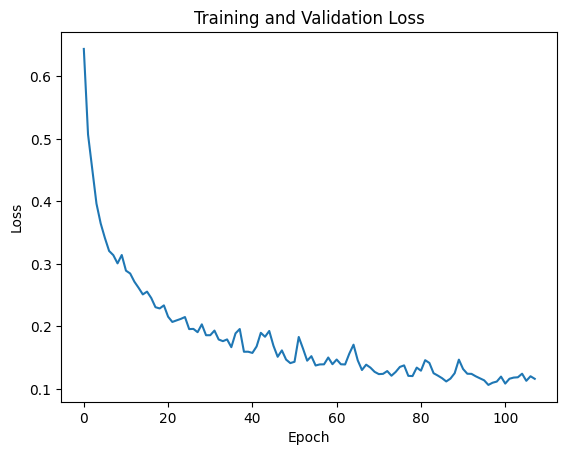

In [14]:
import matplotlib.pyplot as plt

# Entraînement du modèle
mlp.fit(X_train, y_train)

# Tracer la courbe de perte
plt.plot(mlp.loss_curve_)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
mlp = MLPClassifier(alpha=0.01,max_iter=1250,batch_size=16,learning_rate_init=0.01,hidden_layer_sizes=150)
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=16, hidden_layer_sizes=150,
              learning_rate_init=0.01, max_iter=1250)

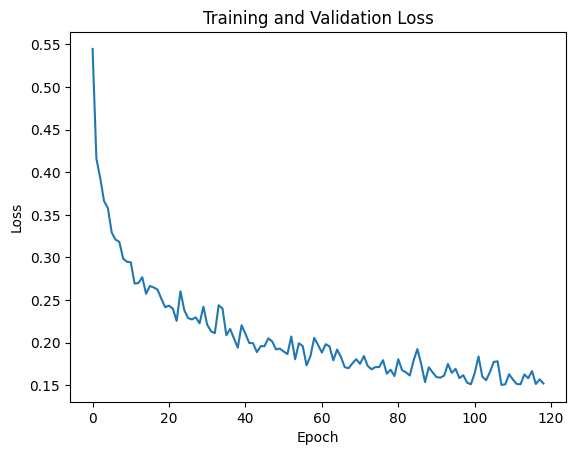

In [11]:
import matplotlib.pyplot as plt

# Entraînement du modèle
mlp.fit(X_train, y_train)

# Tracer la courbe de perte
plt.plot(mlp.loss_curve_)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()